# Assignment 01

**Course**: AML 2304 Natural Language Processing

**Names:**

- Ashvin Alex
- Bastian Castillo
- Fadernel Bedoya
- Darshan Ruparel
- Marcelo Munoz

### Objective:
In this assigment an Amazon Product Reviews dataset was analized to predict sentimental analysis based only users reviews and stars rating using NLTK library to text pre-processing and Sci-kit Learn library to train classification models.

Due to the amount of resources for storage and processing needed for the entire dataset (7.2 GB), it was decided to work with a subset of homogenous data, that means it was selected 20000 records, 4000 record aprox. per each category of star rating (1-5).

Four models were used to classify as a binary and multiclass targets, after discretizing the rating and vectorizing each reaviews from the entire dataset.

### Dataset metadata

The dataset contains **20000** sample records of **reviews** of different wireless products sell by **Amazon**.The description of the columns are the following:

<br>

1. **marketplace**       - 2 letter country code of the 
marketplace where the review was written.

2. **customer_id**       - Random identifier that can be used to aggregate reviews written by a single author.

3. **review_id**         - The unique ID of the review.

4. **product_id**        - The unique Product ID the review pertains to. In the multilingual dataset the reviews for the same product in different countries can be grouped by the same product_id.

5. **product_parent**    - Random identifier that can be used to aggregate reviews for the same product.

6. **product_title**     - Title of the product.

7. **product_category**  - Broad product category that can be used to group reviews (also used to group the dataset into coherent parts).

8. **star_rating**       - The 1-5 star rating of the review.

9. **helpful_votes**     - Number of helpful votes.

10. **total_votes**       - Number of total votes the review received.

11. **vine**              - Review was written as part of the Vine program.

12. **verified_purchase** - The review is on a verified purchase.

13. **review_headline**   - The title of the review.

14. **review_body**       - The review text.

15. **review_date**       - The date the review was written.

### Import libraries

In [ ]:
!pip install symspellpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
import string
import re
from symspellpy import SymSpell
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pickle

### Load dataset

In [ ]:
gh_dataset = "https://raw.githubusercontent.com/bascr/amazon-comments-reviews-nlp/main/dataset/subset_2_amazon_reviews_us_Wireless_v1_00.tsv"
df = pd.read_csv(gh_dataset, sep='\t', on_bad_lines = 'warn')

# show some amples
df.sample(10)

b'Skipping line 19080: expected 15 fields, saw 22\n'


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
7429,US,5605954.0,R2FBTBDEK6K4NE,B008LAMJSC,605137397.0,Plantronics M25 Bluetooth Headset - Frustratio...,Wireless,2.0,0.0,0.0,N,Y,Not as good as the last one!,I'm somewhat disappointed with this Bluetooth....,2015-08-31
16877,US,7383926.0,RVL1RWKXG5BUU,B00T6NT7EM,323189996.0,iPhone 6 Case (4.7) - Clear Cover - Very Thin ...,Wireless,2.0,0.0,0.0,N,Y,... I received the same case that got so many ...,I don't think I received the same case that go...,2015-08-28
17385,US,10806627.0,R1WGXLFEOIZ6J0,B00TUGU84I,40047355.0,SoundBot SB735 Bluetooth 4.0 Wireless Stereo H...,Wireless,3.0,0.0,0.0,N,Y,"Above average, but fragile.","I enjoyed these headphones quite a bit, and th...",2015-08-28
11084,US,45666823.0,RACP90W4BI35P,B00SMOXM4W,686141245.0,"Sony Xperia Z3v (Verizon) Case, Kaleidio [Exo ...",Wireless,4.0,0.0,0.0,N,Y,Four Stars,As advertised.,2015-08-30
16902,US,26812193.0,R3TD9WWRTJ206O,B000CNAEEW,442032511.0,Midland Transparent Security Headsets with PTT...,Wireless,3.0,0.0,0.0,N,Y,"PTT, YES......VOX NO WAY!!!","If your getting this for the VOX capability, m...",2015-08-28
9293,US,521192.0,R3C7HKEKEU31JK,B00WUD4C68,574425463.0,Cell Phone holder,Wireless,4.0,0.0,0.0,N,Y,Easy to use,Decent holder. Easy to use.,2015-08-31
3563,US,15014445.0,RIVPQZWP0JTUW,B00FA9EIWC,902577766.0,"iPhone 5C Case, Caseology® [Fusion Series] Scr...",Wireless,4.0,0.0,0.0,N,Y,Fits perfectly. You don't have to struggle to ...,Fits perfectly. You don't have to struggle to...,2015-08-31
2610,US,42288806.0,ROG052U86UZ2F,B00HB1O1DS,585766532.0,LG Google Nexus 5 G2 D820 LCD Touch Screen Dig...,Wireless,5.0,0.0,0.0,N,Y,Excellent purchase from Fixing_DIY,I ordered from Fixing_DIY just over two weeks ...,2015-08-31
18933,US,33502108.0,R1V2Q16976X0WL,B00TI2HCS4,679246500.0,TaoTronics Selfie Stick with Built-In Remote S...,Wireless,3.0,0.0,0.0,N,Y,Very Easy to Use,I like this selfie stick and it works very wel...,2015-08-27
7390,US,1553061.0,R2EXSWC54ZPQPC,B00H14RQPK,504006454.0,Marswell Women Men Touch Screen Circular Patte...,Wireless,4.0,0.0,0.0,N,N,Not as expected,"Nothing new in this watch, same as the other w...",2015-08-31


In [ ]:
rows, cols = df.shape
print(f"Total number of rows: {rows}")
print(f"Total number of columns: {cols}")

Total number of rows: 19942
Total number of columns: 15


### Missing values

Missing values percentages

In [ ]:
(df.isnull().sum() / df.shape[0]) * 100

marketplace          0.000000
customer_id          0.005015
review_id            0.005015
product_id           0.005015
product_parent       0.005015
product_title        0.005015
product_category     0.005015
star_rating          0.005015
helpful_votes        0.005015
total_votes          0.005015
vine                 0.005015
verified_purchase    0.005015
review_headline      0.005015
review_body          0.030087
review_date          0.005015
dtype: float64

Counting number of rows with missing values

In [ ]:
missing_values_total = len(df[df.isna().any(axis=1)])
print(f"Total missing values : {missing_values_total} rows")

Total missing values : 6 rows


Showing rows with missing values

In [ ]:
df[df.isna().any(axis=1)]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
9652,US,25097242.0,RG3HSQ2BC8ZZX,B00KW70WDG,405626944.0,U8 Bluetooth Smart Watch WristWatch Phone with...,Wireless,1.0,17.0,20.0,N,Y,One Star,NaN,2015-08-30
12656,US,7372340.0,R3673TUTY3O6ZQ,B00S93RNBO,858979704.0,"iPhone 6 Plus Case, LoHi Slim Ultimate Vibrant...",Wireless,1.0,1.0,7.0,N,N,One Star,NaN,2015-08-30
12748,US,1172122.0,R39OVC8O7ICZ3R,B00LP5IV5U,294911944.0,[ManiaGear] Design Graphic Image Shell Cover H...,Wireless,1.0,0.0,0.0,N,Y,One Star,NaN,2015-08-30
13299,US,10315234.0,R3KZCPSHC1OMT7,B00NN94T0W,280320221.0,"iPhone 6S Plus Case, Verus [Damda Slide]4",Wireless,3.0,4.0,4.0,N,Y,Almost Great,NaN,2015-08-30
14954,US,1496491.0,R311S65Z60XZ5W,B00VNPXUPS,298435167.0,Ipow Magnetic Cradle-less Windshield Long Arm ...,Wireless,4.0,2.0,2.0,N,Y,Four Stars,NaN,2015-08-29
19076,US 4877578 RE09JY3CKRS8U B00JP8MZGK 678697...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ommiting rows with missing values

In [ ]:
df_1 = df.dropna()
rows, cols = df_1.shape
print(f"Total number of rows after drop missing values: {rows}")
print(f"Total number of columns after drop missing values: {cols}")

Total number of rows after drop missing values: 19936
Total number of columns after drop missing values: 15


The "review_body" column was the only column with missing values, corresponding to 0.02% (4 rows) from the total dataset. Considering the small number of rows with missing values and because the "review_body" column contains the most critical data for this NLP project, the rows were omitted.

One row has failed to be parsed. I was check the tabulation character in the row with other tools, and encoding checking, but it was ok. Because is just one row, it was removed.


Next the validations uniques values for the labels is done to make sure there is no missing values for the target, like -1, or other non valid value. As it can be seen, there is no invalid values in star_rating column:

In [ ]:
df_1["star_rating"].unique()

array([4., 5., 3., 1., 2.])

### EDA

#### Number of review by Star Rating

In [ ]:
df_1["star_rating"] = df_1["star_rating"].apply(np.int32)

<ipython-input-11-cde22ccdefc9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["star_rating"] = df_1["star_rating"].apply(np.int32)


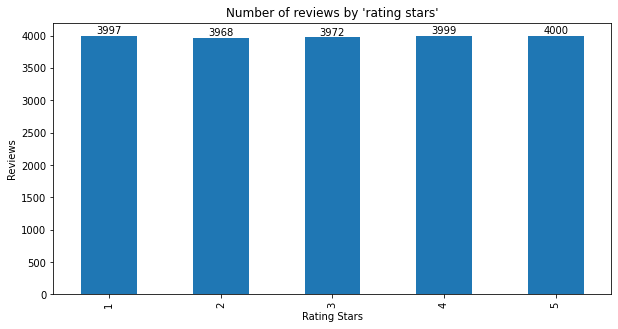

In [ ]:
ax = df_1["star_rating"].value_counts() \
  .sort_index() \
  .plot(kind="bar",
        title="Number of reviews by 'rating stars'",
        figsize=(10, 5))

for bars in ax.containers:
    ax.bar_label(bars) 

ax.set_xlabel("Rating Stars")
ax.set_ylabel("Reviews")
plt.show()

#### Top 30 products with more reviews

<Axes: xlabel='Product'>

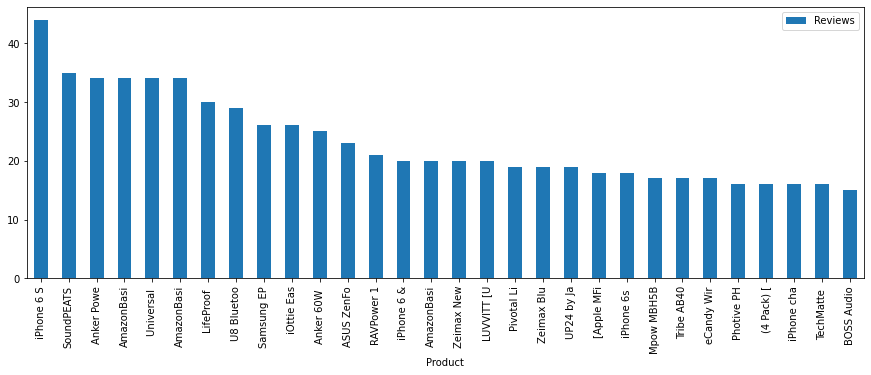

In [ ]:
product_reviews = df_1["product_title"].value_counts().head(30).to_frame()
product_reviews.reset_index(inplace=True)
product_reviews.columns = ["Product", "Reviews"]
product_reviews["Product"] = product_reviews["Product"].apply(lambda x: x[:10])
product_reviews.plot(x="Product", y="Reviews", kind="bar", figsize=(15,5))


#### Distribution of Rating by date

<Axes: xlabel='Date'>

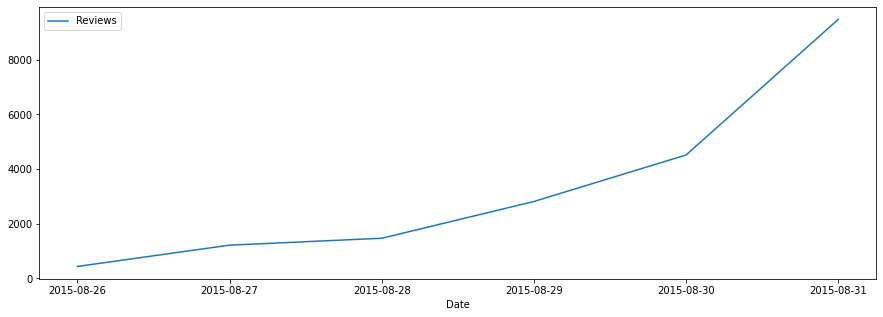

In [ ]:
rating_by_date = df_1["star_rating"].groupby(df_1["review_date"]).count().to_frame()
rating_by_date.reset_index(inplace=True)
rating_by_date.columns = ["Date", "Reviews"]
rating_by_date.plot(x="Date", y="Reviews", kind="line", figsize=(15,5))

### Text Processing

#### Removing punctuation and numbers

Dataframe before removing punctuation

In [ ]:
df_2 = df_1[["review_body", "star_rating"]].copy(deep=True)
df_2

,review_body,star_rating
0,"I’m embarrassed to admit that until recently, ...",4
1,Fits iPhone 6 well,5
2,Great charger. I easily get 3+ charges on a S...,5
3,Great for the price :-),5
4,"Great Case, better customer service!",5
...,...,...
19937,I bought this charging cable a few months ago ...,2
19938,Phone did not fit into the case properly.,2
19939,I really liked this phone case. The feel and a...,2
19940,item was smaller that my phone,2


Apply removing punctuation and numbers function and shows dataframe after changes applied

In [ ]:
df_2["review_body"] = df_2["review_body"].apply(lambda text: re.sub(r"[^a-z\s]", "", text.lower()))
df_2

,review_body,star_rating
0,im embarrassed to admit that until recently i ...,4
1,fits iphone well,5
2,great charger i easily get charges on a sams...,5
3,great for the price,5
4,great case better customer service,5
...,...,...
19937,i bought this charging cable a few months ago ...,2
19938,phone did not fit into the case properly,2
19939,i really liked this phone case the feel and ae...,2
19940,item was smaller that my phone,2


#### Fixing lengthening

In [ ]:
def remove_lengthening(text: str) -> str:
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

df_2["review_body"] = df_2["review_body"].apply(lambda text: remove_lengthening(text))
df_2

,review_body,star_rating
0,im embarrassed to admit that until recently i ...,4
1,fits iphone well,5
2,great charger i easily get charges on a sams...,5
3,great for the price,5
4,great case better customer service,5
...,...,...
19937,i bought this charging cable a few months ago ...,2
19938,phone did not fit into the case properly,2
19939,i really liked this phone case the feel and ae...,2
19940,item was smaller that my phone,2


#### Spell checker

The spelling of each word from the reviews are checked and fixed using symspellpy library.

Downloading dictionary corpus of words:

In [ ]:
!wget https://raw.githubusercontent.com/wolfgarbe/SymSpell/master/SymSpell/frequency_dictionary_en_82_765.txt

--2023-03-21 01:17:26--  https://raw.githubusercontent.com/wolfgarbe/SymSpell/master/SymSpell/frequency_dictionary_en_82_765.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1332881 (1.3M) [text/plain]
Saving to: ‘frequency_dictionary_en_82_765.txt.5’

frequency_dictionar 100%[===================>]   1.27M  --.-KB/s    in 0.06s   

2023-03-21 01:17:26 (23.1 MB/s) - ‘frequency_dictionary_en_82_765.txt.5’ saved [1332881/1332881]



In [ ]:
symsp = SymSpell()
symsp.load_dictionary("frequency_dictionary_en_82_765.txt",
                      term_index=0, 
                      count_index=1, 
                      separator=" ")

def fix(text: str):
    terms = symsp.lookup_compound(text, max_edit_distance=2) 
    return terms[0].term


df_2["review_body"] = df_2["review_body"].apply(lambda text: fix(text))
df_2

,review_body,star_rating
0,in embarrassed to admit that until recently i ...,4
1,fits iphone well,5
2,great charger i easily get charges on a samsun...,5
3,great for ﻿the price,5
4,great case better customer service,5
...,...,...
19937,i bought this charging cable a few months ago ...,2
19938,phone did not fit into ﻿the case properly,2
19939,i really liked this phone case ﻿the feel and a...,2
19940,item was smaller that my phone,2


#### Word tokenization and stopwords removal

Each stopword is removed and also those tokens shorter than 4 letters. Each review is tokenized and stored in a new list to continue, with the processing.

In [ ]:
stop_words_list = stopwords.words("english")

def tokenization_review(review_body: str, rating: int) -> list:
    tokenized_review = word_tokenize(review_body)
    token_list = []
    for token in tokenized_review:
        if token not in stop_words_list and len(token) > 3 and token != "\ufeffthe":
            token_list.append(token)
    return token_list, rating

tokenized_review_list = [tokenization_review(review, rating) for review, rating in zip(df_2["review_body"], df_2["star_rating"])]

sample = 10
print(f"Sample: first {sample} tokenized rows: ")

for _ in tokenized_review_list[:sample + 1]:
    print(_)

Sample: first 10 tokenized rows: 
(['embarrassed', 'admit', 'recently', 'negative', 'opinion', 'self', 'sticks', 'pods', 'marci', 'sticks', 'reviewed', 'number', 'recently', 'growing', 'pretty', 'nice', 'simple', 'easy', 'instructions', 'illustrated', 'back', 'sure', 'reviewers', 'stated', 'instructions', 'clearly', 'printed', 'unless', 'received', 'different', 'packaging', 'assembled', 'pairing', 'bluetooth', 'stick', 'easy', 'intuitive', 'nothing', 'stick', 'comes', 'charging', 'cable', 'arrived', 'charge', 'immediately', 'though', 'probably', 'good', 'idea', 'charge', 'right', 'away', 'interruption', 'make', 'sure', 'stick', 'switched', 'light', 'extend', 'stick', 'length', 'desire', 'yards', 'length', 'snap', 'away', 'phone', 'clamp', 'held', 'phone', 'sturdily', 'want', 'worried', 'slipping', 'longer', 'extend', 'stick', 'harder', 'makeover', 'happen', 'stick', 'specific', 'particular', 'things', 'could', 'improve', 'option', 'clamp', 'portrait', 'orientation', 'instead', 'hold', 

#### Part of Speech - POS

In [ ]:
def pos(tokenized_review_list: list) -> list:
    pos_review_list =[]

    for review, rating in tokenized_review_list:
        pos_review_list.append((nltk.pos_tag(review), rating))

    return pos_review_list

pos_review_list = pos(tokenized_review_list)

sample = 10
print(f"Sample: first {sample} part-of-speech (POS) classified rows: ")

for _ in pos_review_list[:sample + 1]:
    print(_)

Sample: first 10 part-of-speech (POS) classified rows: 
([('embarrassed', 'JJ'), ('admit', 'NN'), ('recently', 'RB'), ('negative', 'JJ'), ('opinion', 'NN'), ('self', 'NN'), ('sticks', 'NNS'), ('pods', 'NNS'), ('marci', 'VBP'), ('sticks', 'NNS'), ('reviewed', 'VBD'), ('number', 'NN'), ('recently', 'RB'), ('growing', 'VBG'), ('pretty', 'JJ'), ('nice', 'JJ'), ('simple', 'JJ'), ('easy', 'JJ'), ('instructions', 'NNS'), ('illustrated', 'VBD'), ('back', 'RP'), ('sure', 'JJ'), ('reviewers', 'NNS'), ('stated', 'VBD'), ('instructions', 'NNS'), ('clearly', 'RB'), ('printed', 'VBD'), ('unless', 'IN'), ('received', 'VBN'), ('different', 'JJ'), ('packaging', 'NN'), ('assembled', 'VBD'), ('pairing', 'VBG'), ('bluetooth', 'DT'), ('stick', 'JJ'), ('easy', 'JJ'), ('intuitive', 'JJ'), ('nothing', 'NN'), ('stick', 'NN'), ('comes', 'VBZ'), ('charging', 'VBG'), ('cable', 'NN'), ('arrived', 'JJ'), ('charge', 'NN'), ('immediately', 'RB'), ('though', 'IN'), ('probably', 'RB'), ('good', 'JJ'), ('idea', 'NN'), (

#### Lematization

In [ ]:
def get_pos(tag):

    if tag.startswith("J"):
        return "a"
    elif tag.startswith("V"):
        return "v"
    elif tag.startswith("N"):
        return "n"
    elif tag.startswith("R"):
        return "r"
    else:
        return "n"

def lemmatize(pos_review_list: list) -> list:

    lem = WordNetLemmatizer()

    lemmatized_review_list = []

    for reviews, rating in pos_review_list:
        lemmatized_review = []
        for token in reviews:
            pos = get_pos(token[1])
            lemmatized_review.append(lem.lemmatize(token[0], pos=pos))
        lemmatized_review_list.append((lemmatized_review, int(rating)))
    
    return lemmatized_review_list

lemmatized_review_list = lemmatize(pos_review_list)

sample = 10
print(f"Sample: first {sample} lemmatized rows: ")

for _ in lemmatized_review_list[:sample + 1]:
    print(_)

Sample: first 10 lemmatized rows: 
(['embarrassed', 'admit', 'recently', 'negative', 'opinion', 'self', 'stick', 'pod', 'marci', 'stick', 'review', 'number', 'recently', 'grow', 'pretty', 'nice', 'simple', 'easy', 'instruction', 'illustrate', 'back', 'sure', 'reviewer', 'state', 'instruction', 'clearly', 'print', 'unless', 'receive', 'different', 'packaging', 'assemble', 'pair', 'bluetooth', 'stick', 'easy', 'intuitive', 'nothing', 'stick', 'come', 'charge', 'cable', 'arrived', 'charge', 'immediately', 'though', 'probably', 'good', 'idea', 'charge', 'right', 'away', 'interruption', 'make', 'sure', 'stick', 'switch', 'light', 'extend', 'stick', 'length', 'desire', 'yard', 'length', 'snap', 'away', 'phone', 'clamp', 'hold', 'phone', 'sturdily', 'want', 'worried', 'slipping', 'longer', 'extend', 'stick', 'harder', 'makeover', 'happen', 'stick', 'specific', 'particular', 'thing', 'could', 'improve', 'option', 'clamp', 'portrait', 'orientation', 'instead', 'hold', 'stick', 'portrait', 'angl

#### Bags Of Words - Count frequency words 

In [ ]:
def bow(lemmatized_review_list: list) -> tuple:
    # combining reviews
    review_list = []
    for review, rating in lemmatized_review_list:
        processed_review = ""
        for token in review:
            processed_review += f"{token} "
        review_list.append(processed_review.strip())
        
    count = CountVectorizer()
    bag_of_words = count.fit_transform(review_list)

    return count, bag_of_words

count, bag_of_words = bow(lemmatized_review_list)

print(count.get_feature_names_out())
print(bag_of_words.toarray())

['abandon' 'abandonment' 'abbr' ... 'zone' 'zoom' 'zulu']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
def reduce_target(rating: int):
    if rating >= 3:
        return 1
    else:
        return 0

def bow_to_df(lemmatized_review_list: list, count: np.ndarray, bag_of_words: np.ndarray) -> pd.DataFrame:
    target = [rating for review, rating in lemmatized_review_list]

    columns = count.get_feature_names_out().tolist()

    bow_df = pd.DataFrame(data=bag_of_words.toarray(), columns=columns)
    bow_df["STAR_RATINGS"] = target
    bow_df["TARGET"] = bow_df["STAR_RATINGS"].apply(reduce_target)
    return bow_df

df_3 = bow_to_df(lemmatized_review_list, count, bag_of_words).copy(deep=True)
df_3

,abandon,abandonment,abbr,abbreviate,aberration,ability,able,abler,ably,abnormality,...,ziploc,zipper,zippered,zippy,zombie,zone,zoom,zulu,STAR_RATINGS,TARGET
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
19932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
19933,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
19934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0


#### Distribution of word frequency

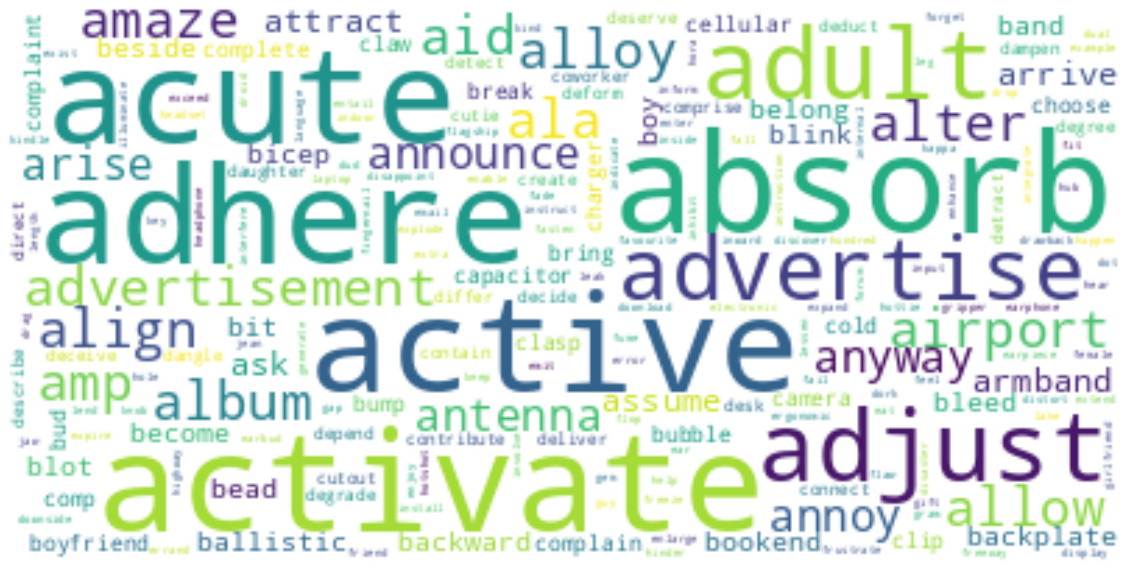

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator

bag_of_words = df_3.drop(["TARGET", "STAR_RATINGS"], axis=1)
text = " ".join(bag_of_words.columns)
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(text)
plt.figure(figsize=[20,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


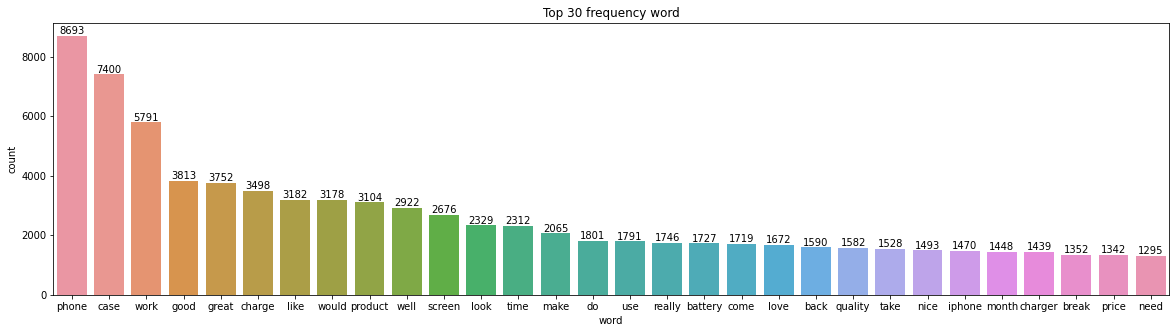

In [ ]:
freq_words = df_3.drop(["TARGET", "STAR_RATINGS"], axis=1)
freq_words = freq_words.sum().sort_values(ascending=False).to_frame()
freq_words = freq_words.reset_index()
freq_words.columns = ["word", "count"]

fix, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=freq_words[:30], x="word", y="count", ax=ax)
ax.set_title("Top 30 frequency word")

for bars in ax.containers:
    ax.bar_label(bars) 

plt.show()

In [ ]:
def neg_neu_pos(lemmatized_review_list: list, count: np.ndarray) -> pd.DataFrame:
    target = []
    sentiment_values = []
    
    for review, rating in lemmatized_review_list:
        target.append(rating)
        
        if rating < 3:
            sentiment_values.append([1, 0, 0])
        if rating == 3:
            sentiment_values.append([0, 1, 0])
        if rating > 3:
            sentiment_values.append([0, 0, 1])

    columns = count.get_feature_names_out().tolist()

    bow_df = pd.DataFrame(data=target, columns=["STAR_RATING"])
    bow_df[["NEG", "NEU", "POS"]] = sentiment_values
    bow_df["TARGET"] = bow_df["STAR_RATING"].apply(reduce_target)
    return bow_df

df_sent = neg_neu_pos(lemmatized_review_list, count).copy(deep=True)
df_sent

,STAR_RATING,NEG,NEU,POS,TARGET
0,4,0,0,1,1
1,5,0,0,1,1
2,5,0,0,1,1
3,5,0,0,1,1
4,5,0,0,1,1
...,...,...,...,...,...
19931,2,1,0,0,0
19932,2,1,0,0,0
19933,2,1,0,0,0
19934,2,1,0,0,0


<Axes: xlabel='Sentiment'>

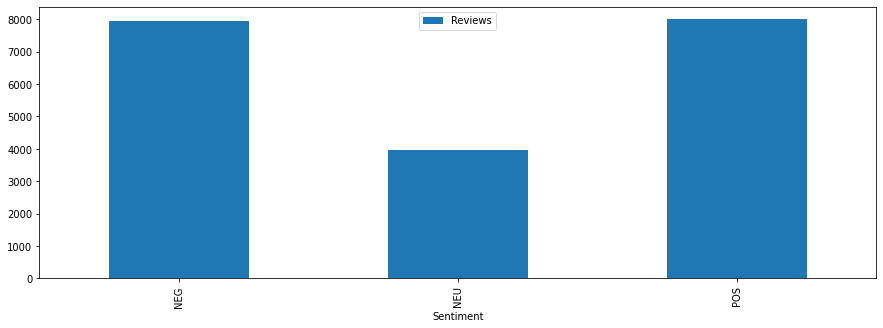

In [ ]:
nnp = df_sent[["NEG", "NEU", "POS"]].sum().to_frame()
nnp.reset_index(inplace=True)
nnp.columns = ["Sentiment", "Reviews"]
nnp.plot(x="Sentiment", y="Reviews", kind="bar", figsize=(15,5))

### Feature extraction - Bag of Words

In [ ]:
def select_features(data_frame: pd.DataFrame, lemmatized_review_list: list, number_words: int) -> pd.DataFrame:
    all_words = [word for review, rating in lemmatized_review_list for word in review]
    counter_dict = nltk.FreqDist(all_words)

    selected_features = [word[0] for word in counter_dict.most_common(number_words)]

    # Select also the target from bag of words dataframe
    selected_features.append("TARGET")

    df_sf = data_frame[selected_features]
    df_sf.drop(["phone", "case"], axis=1)
    return df_sf

df_4 = select_features(df_3, lemmatized_review_list, number_words=7000)
df_4

,phone,case,work,good,great,charge,like,would,product,well,...,administrator,aficionado,poof,cleaned,reacts,soybean,skipping,intermixed,invitation,TARGET
0,3,0,0,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19931,0,0,1,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
19932,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19933,1,3,0,0,1,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19934,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


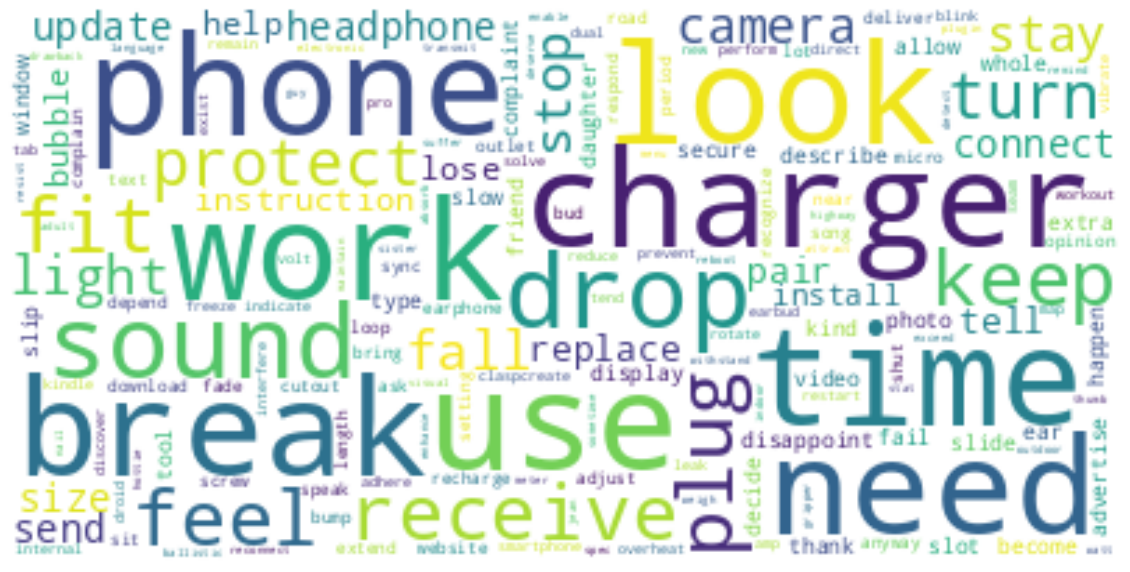

In [ ]:
bag_of_words = df_4.drop(["TARGET"], axis=1)
text = " ".join(bag_of_words.columns)
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white").generate(text)
plt.figure(figsize=[20,15])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Split data

In [ ]:
X = df_4.drop("TARGET", axis=1)
y = df_4["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Random Forest Classification (RFC) model

In [ ]:
rfc_model = RandomForestClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rfc_model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

### RFC Models evaluation

In [ ]:
rfc_model.fit(X_train, y_train)
rfc_y_hat = rfc_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, rfc_y_hat)
precision = precision_score(y_test, rfc_y_hat, average='micro')
recall = recall_score(y_test, rfc_y_hat, average='micro')
f1 = f1_score(y_test, rfc_y_hat, average='micro')

print(' Accuracy score: {:2.1f}%'.format(accuracy*100.))
print('Precision score: {:2.1f}%'.format(precision*100.))
print('   Recall score: {:2.1f}%'.format(recall*100.))
print('       F1 score: {:2.1f}%'.format(f1*100.))

 Accuracy score: 77.6%
Precision score: 77.6%
   Recall score: 77.6%
       F1 score: 77.6%


In [ ]:
pd.DataFrame({
    "Real": y_test,
    "Predicted": rfc_y_hat   
}).sample(20)

,Real,Predicted
6097,1,1
17664,1,0
17006,1,0
11106,1,1
4104,0,0
18690,0,0
15960,0,1
3043,0,0
4021,1,1
10870,0,0


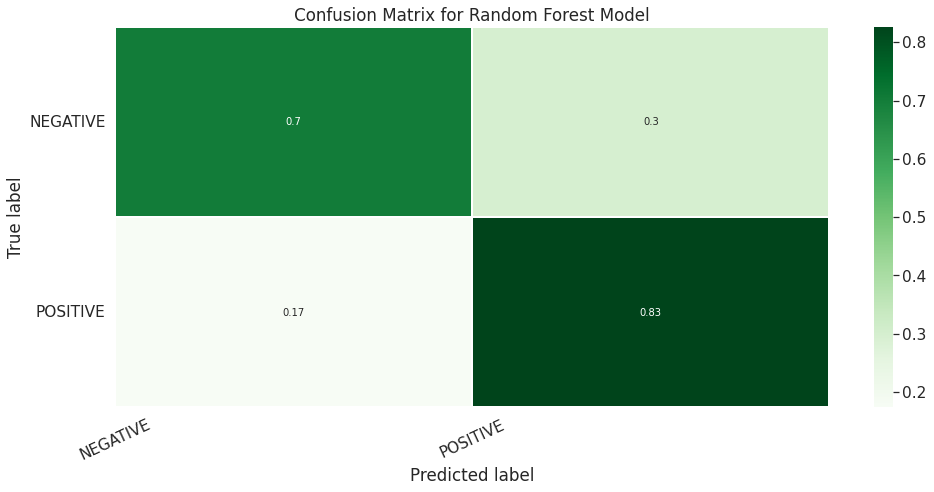

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rfc_y_hat)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ["NEGATIVE", "POSITIVE"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### Save RFC model

In [ ]:
save_rfc_model = open("random_forest_classifer_model.pkl", "wb")
pickle.dump(rfc_model, save_rfc_model)
save_rfc_model.close()

### Train GaussianNB model

In [ ]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

### GaussianNB Model evaluation

In [ ]:
gnb_y_hat = gnb_model.predict(X_test)

accuracy = accuracy_score(y_test, gnb_y_hat)
precision = precision_score(y_test, gnb_y_hat, average='micro')
recall = recall_score(y_test, gnb_y_hat, average='micro')
f1 = f1_score(y_test, gnb_y_hat, average='micro')

print(' Accuracy score: {:2.1f}%'.format(accuracy*100.))
print('Precision score: {:2.1f}%'.format(precision*100.))
print('   Recall score: {:2.1f}%'.format(recall*100.))
print('       F1 score: {:2.1f}%'.format(f1*100.))

 Accuracy score: 45.1%
Precision score: 45.1%
   Recall score: 45.1%
       F1 score: 45.1%


In [ ]:
pd.DataFrame({
    "Real": y_test,
    "Predicted": gnb_y_hat   
}).sample(20)

,Real,Predicted
4556,1,1
14092,1,0
15503,0,0
803,1,0
2760,1,1
7722,1,0
14812,0,0
14168,1,0
7559,0,0
16316,1,1


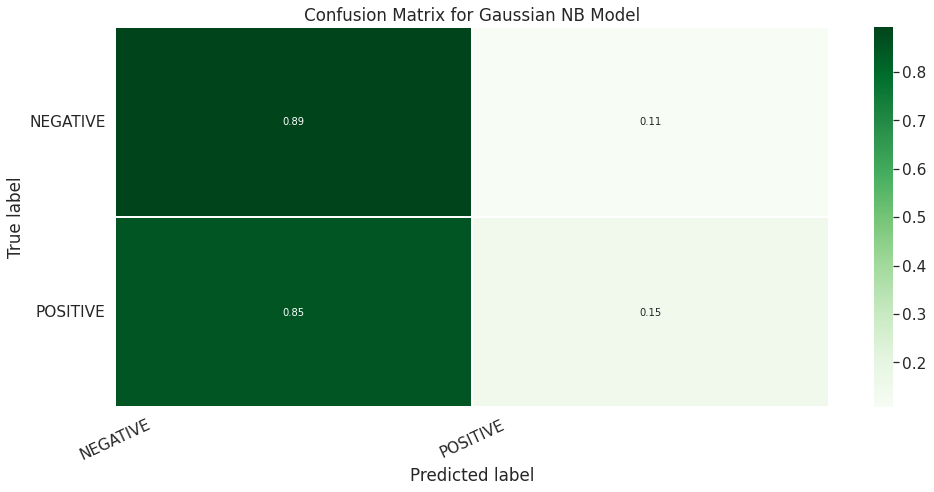

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, gnb_y_hat)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ["NEGATIVE", "POSITIVE"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Gaussian NB Model')
plt.show()

### Save GaussianNB model

In [ ]:
save_gnb_model = open("gaussiannb_classifer_model.pkl", "wb")
pickle.dump(gnb_model, save_gnb_model)
save_gnb_model.close()

#### TF-IDF

In [ ]:
def discretize_target(rating: int):
    if rating < 3:
        return 0
    if rating > 3:
        return 2
    return 1

def tf_idf(lemmatized_review_list: list, max_features: int) -> pd.DataFrame:

  lemm_data = [" ".join(review) for review, rating in lemmatized_review_list]
  tfidf = TfidfVectorizer(binary=False, max_features=max_features)
  feature_matrix = tfidf.fit_transform(lemm_data)
  ordered_idx = dict(sorted(tfidf.vocabulary_.items(), key=lambda item: item[1]))
  df_tfidf = pd.DataFrame(feature_matrix.toarray(), columns=ordered_idx.keys())

  target = [rating for review, rating in lemmatized_review_list]
  df_tfidf["STAR_RATINGS"] = target
  df_tfidf["TARGET"] = df_tfidf["STAR_RATINGS"].apply(discretize_target)
  df_tfidf.drop(["STAR_RATINGS"], axis=1, inplace=True)

  return df_tfidf

df_5 = tf_idf(lemmatized_review_list, 7000)
df_5

,abandon,abbr,ability,able,abler,abroad,absolute,absolutely,absorb,absorbent,...,zillion,zip,ziploc,zipper,zippered,zippy,zombie,zone,zoom,TARGET
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19931,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
19934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
df_5["TARGET"].unique()

array([2, 1, 0])

In [ ]:
X = df_5.drop("TARGET", axis=1)
y = df_5["TARGET"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class='ovr')
lr_model.fit(X_train, y_train)
lr_y_hat = lr_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, lr_y_hat)
precision = precision_score(y_test, lr_y_hat, average='micro')
recall = recall_score(y_test, lr_y_hat, average='micro')
f1 = f1_score(y_test, lr_y_hat, average='micro')

print(' Accuracy score: {:2.1f}%'.format(accuracy*100.))
print('Precision score: {:2.1f}%'.format(precision*100.))
print('   Recall score: {:2.1f}%'.format(recall*100.))
print('       F1 score: {:2.1f}%'.format(f1*100.))

 Accuracy score: 69.8%
Precision score: 69.8%
   Recall score: 69.8%
       F1 score: 69.8%


In [ ]:
pd.DataFrame({
    "Real": y_test,
    "Predicted": lr_y_hat
}).sample(20)

,Real,Predicted
15199,2,2
7051,0,0
19576,0,0
11311,0,0
11474,1,0
19464,0,0
19821,0,2
14861,0,0
13928,2,2
16504,1,1


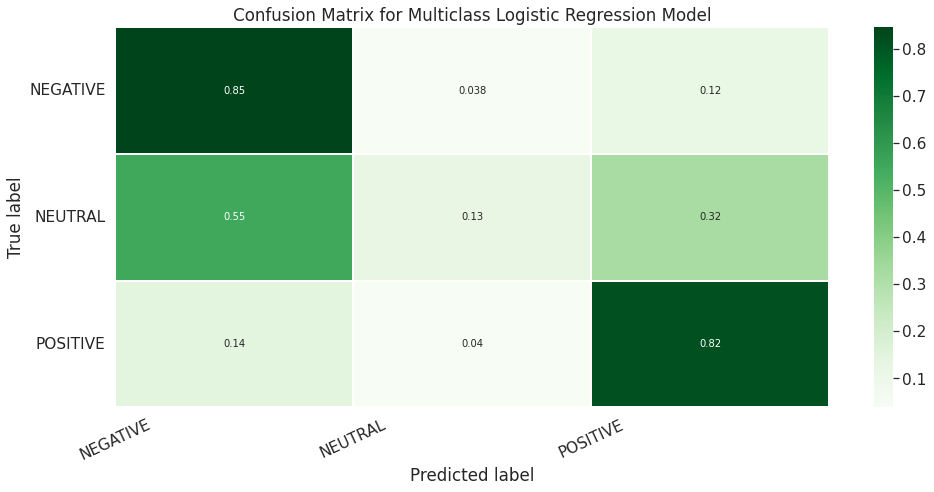

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, lr_y_hat)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ["NEGATIVE", "NEUTRAL", "POSITIVE"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Multiclass Logistic Regression Model')
plt.show()

### Train MultinomialNB model

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

### MultinomialNB Model evaluation

In [ ]:
nb_y_hat = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, nb_y_hat)
precision = precision_score(y_test, nb_y_hat, average='micro')
recall = recall_score(y_test, nb_y_hat, average='micro')
f1 = f1_score(y_test, nb_y_hat, average='micro')

print(' Accuracy score: {:2.1f}%'.format(accuracy*100.))
print('Precision score: {:2.1f}%'.format(precision*100.))
print('   Recall score: {:2.1f}%'.format(recall*100.))
print('       F1 score: {:2.1f}%'.format(f1*100.))

 Accuracy score: 69.0%
Precision score: 69.0%
   Recall score: 69.0%
       F1 score: 69.0%


In [ ]:
pd.DataFrame({
    "Real": y_test,
    "Predicted": nb_y_hat   
}).sample(20)

,Real,Predicted
15550,1,2
16223,1,0
17545,0,2
16483,0,2
12228,2,2
7113,1,0
1005,2,2
18700,1,0
15694,0,0
9584,1,1


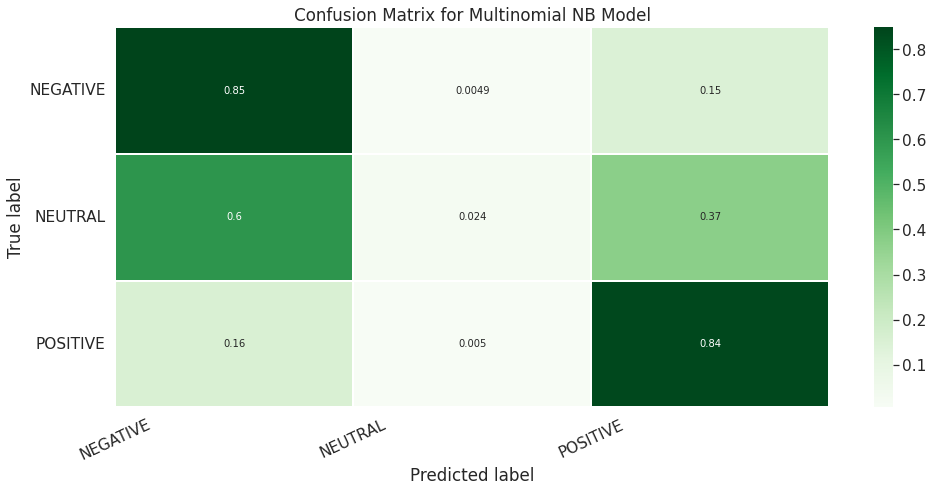

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, nb_y_hat)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ["NEGATIVE", "NEUTRAL", "POSITIVE"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Multinomial NB Model')
plt.show()

### Save MultinomialNB model

In [ ]:
save_nb_model = open("multinomialnb_classifer_model_tfidf.pkl", "wb")
pickle.dump(nb_model, save_nb_model)
save_nb_model.close()

### Load Best Performance Model

In [ ]:
# RFC model
rfc_classifier_file = open("random_forest_classifer_model.pkl", "rb")
rfc_classifier = pickle.load(rfc_classifier_file)
rfc_classifier_file.close()

### Test model

In [ ]:
test_reviews = {
    "reviews": [
        "Everyone was asking me where I found this perfect size wallet cover- perfect for going out and not carrying a bunch of unnecessary things!",
        "Works perfectly, its a convenient length and it seems pretty sturdy.  Compared ro other options on Amaz on Amazon this one is Highly recommended!",
        "Strong case, great quality for the price. Small degree of difficulty to assemble, but overall I would recommend if you are accident prone like me.",
        "There appears to be conflicting info online as to whether this USB charging port assembly also contains the Nexus 4 microphone. Well, it does. As with another reviewer, after installing this replacement part, the microphone did not work. I have contacted the seller (in my case, \"JM Int'L_Ships From Chicago\") and will update my review and rating as soon I know more.<br /><br />For reference, in the product's pic on this page, see the small black square just to the left of the USB port. The microphone is a small metal \"chip\" that is on the reverse side of the circuit board underneath that black square; the black square appears to be a small piece of mesh over the microphone opening (a small pinhole in the circuitboard); this small piece of mesh joins up to a rubber part on the Nexus 4 housing, that leads to the microphone opening on the bottom edge of the outside of the phone.<br /><br />UPDATE JUNE 2014:<br /><br />I have changed my rating from 1 star to 4 stars after receiving a replacement unit from the seller, \"JM Int'L_Ships From Chicago\" (fyi, it appears JM Int'l is also the parent company to related vendors ePartSolution and eRepairSolution). It took a few back and forth emails with them over a few days (always courteous though) to establish that my part was defective and not damaged during install, and I was very pleased when they sent me a replacement at no additional cost. The replacement works great: microphone and charging/data port.",
        "Not only do these go on easily and look exactly like your iPhone's screen, but even after my niece got a hold of the phone and cracked the glass screen protector, Tech Armor replaced it free of charge, including shipping.  Top notch customer service, they just needed the Amazon order # and we were golden.  I'd give TA six or seven stars if I could.  -AD",
        "I love this. I can't part with them now that I have them. Best cover I ever bought and very well made!",
        "I ordered the kit but didn't know it had an antenna.  This antenna was more MHz but it didn't work because it had a female connection and wouldn't work with the kit.  The kit didn't say that you need a male end on the antenna so I sent it back.  It turns out the antenna with the kit worked just fine.",
        "I've used many screen protectors over the years for but none have ever been this clear.  I wasn't sure about the &#34;High Definition&#34; claim but I can confirm that it really is crystal clear.  Installation couldn't have been any easier.  Simply steam up a bathroom to force dust particles out of the air and you won't have single spec of dust between the protector and the screen.<br /><br />One star was taken off simply because the fit could be improved slightly.  The protector is just a little smaller than the screen (which is better than being too large) but this does leave a small (1mm) gap around one side and the top/bottom.<br /><br />Overall, I will happily buy more iSmooth screen protectors for future devices.",
        "This product worked great and for the price I would have to say its fair. But I don't like how the light stays on when the phone is not plugged in. That's about my only complaint.<br /><br />P.S. Don't let the vacuum get a hold of the cord...it'll destroy it. (Don't ask me how I know)",
        "I have had this phone before worked fine but when I got it off here something was wrong with it just remember you get what you pay for.",
        "The TomTom did exactly as we expected.  If there was a traffic tie ups ahead it rerouted us.<br />It also told us where the work zones were any delays.<br /> So far we have not experienced any issues.",
        "I received a free sample from VIPU program for evaluation“ and i got the white one and its very sturdy and sleek i love it!!!",
        "The only thing I didn't care for about this was the texture in my hand. It is cute, inexpensive, arrived quickly and drew compliments.",
        "It's a good for music but when I try to talk to someone ..The other person can't hear me =/",
        "I've been looking for a good quality cable and I found it! Excellent quality, works great! I recommend this cable!",
        "Same protection as an Otterbox and I love the raised home button. Really unique design and protection.. cant ask for more for just a few bucks :)",
        "I found this to meet all my requirements for an item like this. I use it at my work computer to charge/sync my Iphone.",
        "When I upgraded to my new Virgin Mobile LG Optimus F3 I loved everything about it except the back plate.  It lacked the non-slip finish my old Optimus V had, and I always worried about dropping it when trying to work it one-handed.<br /><br />This case solves the problem beautifully.  The finish feels great, it fits the phone perfectly, and it doesn't add bulk.  It looks and feels like a top-quality product.  I had tried a different [[ASIN:B00F1U2WQY case]] but it was bulky and felt cheap.<br /><br />It's hard to find a good quality case for relatively low-end phones like the F3.  I'm grateful that Incipio chose to include the F3 in their product line.",
        "I accidently ordered 2 IPhone pouches for my husband's IPhone 5 but at the rate he breaks them I decided to keep both.  Meanwhile, he loves this pouch and we have one in reserve.  Phone fits in perfectly and he can retrieve it swiftly when necessary.",
        "Took me a minute to figure out how to attach it to my phone. I'm happy with it, no more butt dialing.",

    ],
    "rating": [ 5, 5, 5, 4, 5, 5, 3, 4, 3, 1, 4, 5, 4, 3, 5, 5, 4, 5, 5, 4 ]
}

df_6 = pd.DataFrame(test_reviews)
df_6

,reviews,rating
0,Everyone was asking me where I found this perf...,5
1,"Works perfectly, its a convenient length and i...",5
2,"Strong case, great quality for the price. Smal...",5
3,There appears to be conflicting info online as...,4
4,Not only do these go on easily and look exactl...,5
5,I love this. I can't part with them now that I...,5
6,I ordered the kit but didn't know it had an an...,3
7,I've used many screen protectors over the year...,4
8,This product worked great and for the price I ...,3
9,I have had this phone before worked fine but w...,1


Pre-processing test data

In [ ]:
rfc_classifier.feature_names_in_

array(['phone', 'case', 'work', ..., 'skipping', 'intermixed',
       'invitation'], dtype=object)

In [ ]:
# removing punctuation, number and lowering the text
df_6["reviews"] = df_6["reviews"].apply(lambda text: re.sub(r"[^a-z\s]", "", text.lower()))
# fixing lenghtening
df_6["reviews"] = df_6["reviews"].apply(lambda text: remove_lengthening(text))
# Tokenization
test_tokenized_review_list = [tokenization_review(review, rating) for review, rating in zip(df_6["reviews"], df_6["rating"])]
# POS
test_pos_review_list = pos(test_tokenized_review_list)
# Lemmatization
test_lemmatized_review_list = lemmatize(test_pos_review_list)
# bow
count, bag_of_words = bow(test_lemmatized_review_list)
# bow to df
df_7 = bow_to_df(test_lemmatized_review_list, count, bag_of_words).copy(deep=True)
df_7.drop(["STAR_RATINGS"], axis=1, inplace=True)
df_8 = pd.DataFrame(0, index=np.arange(len(df_7)), columns=rfc_classifier.feature_names_in_)

for bow_feature in rfc_classifier.feature_names_in_:
  if bow_feature in df_7.columns:
    df_8[bow_feature] = df_7[bow_feature]

df_8["TARGET"] = df_7["TARGET"]
df_8



<ipython-input-66-2fd32d887743>:22: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_8["TARGET"] = df_7["TARGET"]


,phone,case,work,good,great,charge,like,would,product,well,...,administrator,aficionado,poof,cleaned,reacts,soybean,skipping,intermixed,invitation,TARGET
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,2,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,1,0,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
9,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split data

In [ ]:
X_ = df_8.drop("TARGET", axis=1)
y_ = df_8["TARGET"]

Test models

In [ ]:
# RFC
rfc_y_hat_ = rfc_classifier.predict(X_)

rfc_df = pd.DataFrame({
    "Real": y_,
    "Predicted": rfc_y_hat_   
}).sample(20)

rfc_df.sort_index(inplace=True)
rfc_df

,Real,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,0
7,1,1
8,1,1
9,0,1


In [ ]:
accuracy = accuracy_score(y_, rfc_y_hat_)
precision = precision_score(y_, rfc_y_hat_, average='micro')
recall = recall_score(y_, rfc_y_hat_, average='micro')
f1 = f1_score(y_, rfc_y_hat_, average='micro')

print(' Accuracy score: {:2.1f}%'.format(accuracy*100.))
print('Precision score: {:2.1f}%'.format(precision*100.))
print('   Recall score: {:2.1f}%'.format(recall*100.))
print('       F1 score: {:2.1f}%'.format(f1*100.))

 Accuracy score: 80.0%
Precision score: 80.0%
   Recall score: 80.0%
       F1 score: 80.0%


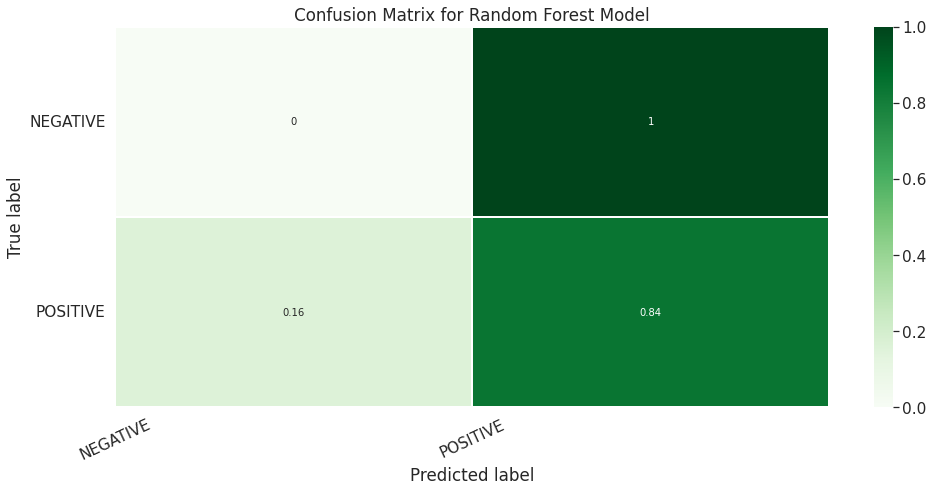

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_, rfc_y_hat_)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ["NEGATIVE", "POSITIVE"]
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()